In [20]:
# 📦 Load required packages
library(DESeq2)
library(ggplot2)
library(dplyr)


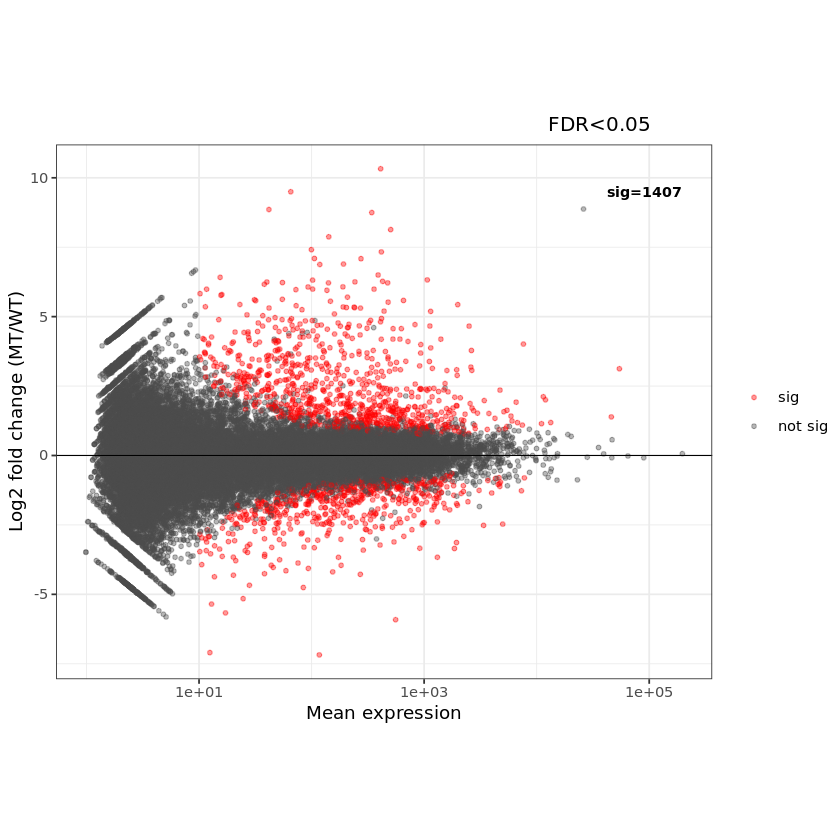

In [21]:
# 📥 Load DESeq2 object
dds <- readRDS("/home/layanomics/CrispAstro-Seq/04_differential_expression/results/dds.rds")

# 📊 Extract results for R270X vs WT
res_df <- as.data.frame(results(dds, contrast = c("condition", "R270X", "WT")))

# 🧪 Optional filtering to match paper: only consider padj < 0.05 + baseMean > 12.3
res_df$signif <- factor(
    ifelse(is.na(res_df$padj), "not sig",
        ifelse(res_df$padj < 0.05 & res_df$baseMean > 10, "sig", "not sig")
    ),
    levels = c("sig", "not sig")
)

# 🖼️ Create the MA plot with ggplot2
ggplot(res_df, aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(color = signif), alpha = 0.4, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("sig" = "red", "not sig" = "gray30")) +
    geom_hline(yintercept = 0, color = "black", lwd = 0.3) +
    annotate("text",
        x = max(res_df$baseMean, na.rm = TRUE), y = 9.5,
        label = paste0("sig=", sum(res_df$signif == "sig", na.rm = TRUE)),
        hjust = 1, size = 3, fontface = "bold"
    ) +
    theme_bw() +
    labs(
        x = "Mean expression",
        y = "Log2 fold change (MT/WT)",
        title = "FDR<0.05",
        color = NULL
    ) +
    theme(
        aspect.ratio = 0.815,
        legend.position = "right",
        plot.title = element_text(hjust = 0.75, face = "plain", size = 12),
        plot.title.position = "plot"
    )


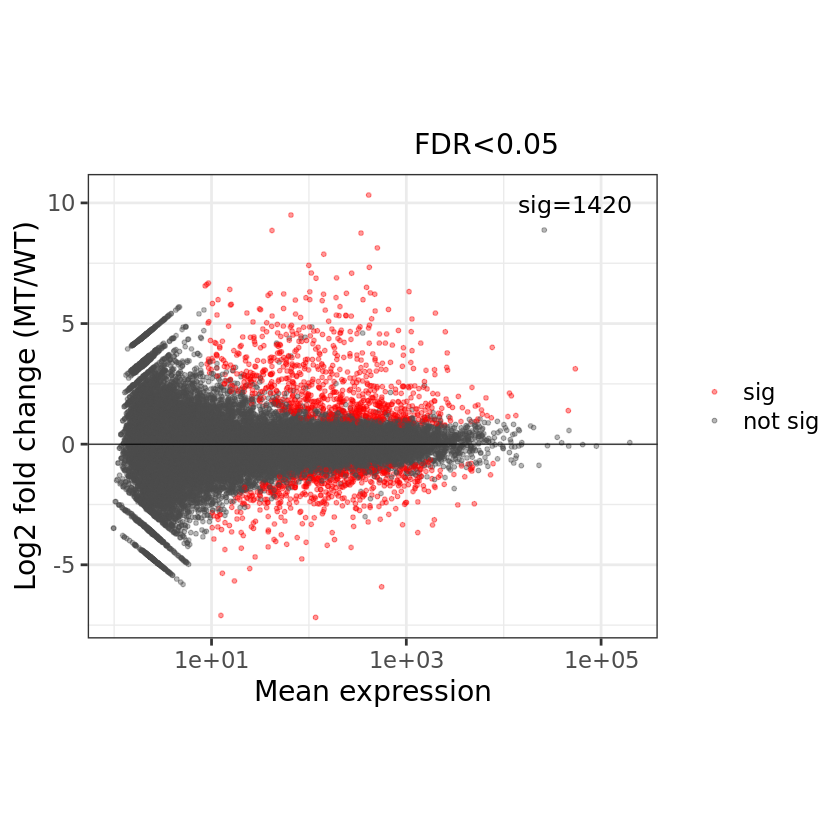

In [22]:
# 📥 Load DESeq2 object
dds <- readRDS("/home/layanomics/CrispAstro-Seq/04_differential_expression/results/dds.rds")

# 📊 Extract results for R270X vs WT
res_df <- as.data.frame(results(dds, contrast = c("condition", "R270X", "WT")))

# 🧪 Apply filtering to match paper:
# padj < 0.05 AND |log2FoldChange| > log2(1.5) ≈ 0.5849625
res_df$signif <- factor(
    ifelse(is.na(res_df$padj), "not sig",
        ifelse(res_df$padj < 0.05 & abs(res_df$log2FoldChange) > 0.5849625, "sig", "not sig")
    ),
    levels = c("sig", "not sig")
)

# 🖼️ Create the MA plot with ggplot2
ggplot(res_df, aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(color = signif), alpha = 0.4, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("sig" = "red", "not sig" = "gray30")) +
    geom_hline(yintercept = 0, color = "black", lwd = 0.3) +
    annotate("text",
        x = max(res_df$baseMean, na.rm = TRUE) * 1.05, # push it further right
        y = 10.3, # closer to top border
        label = paste0("sig=", sum(res_df$signif == "sig", na.rm = TRUE)),
        hjust = 1, vjust = 1, size = 5, fontface = "plain" # bigger font (size = 4)
    ) +
    theme_bw(base_size = 17) +
    labs(
        x = "Mean expression",
        y = "Log2 fold change (MT/WT)",
        title = "FDR<0.05",
        color = NULL
    ) +
    theme(
        aspect.ratio = 0.815,
        legend.position = "right",
        plot.title = element_text(hjust = 0.6, face = "plain", size = 17),
        plot.title.position = "plot"
    )


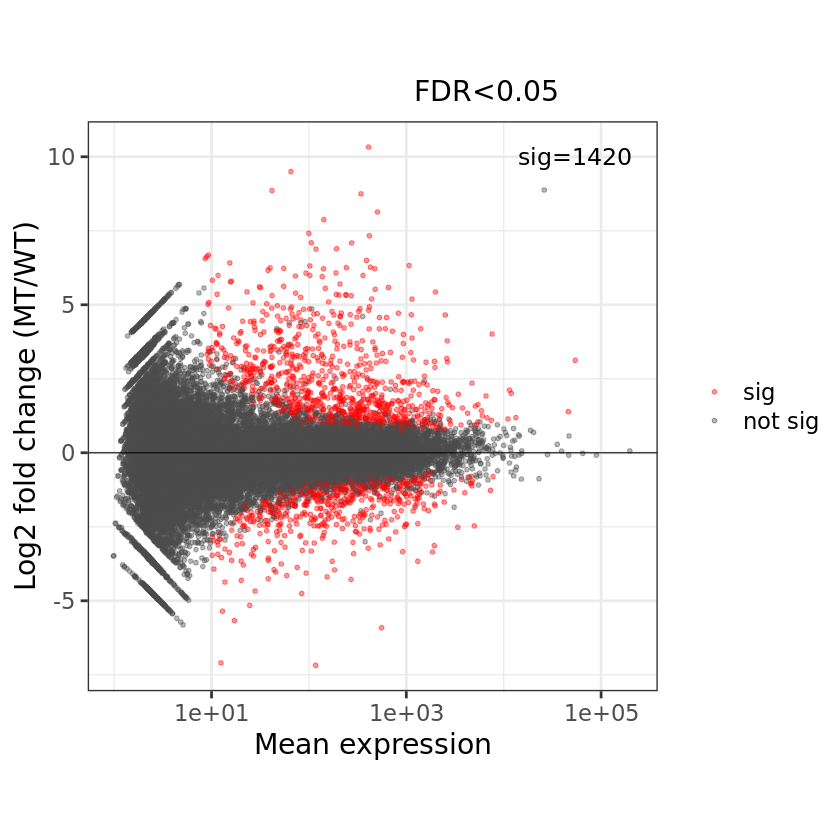

In [23]:
# 📥 Load DESeq2 object
dds <- readRDS("/home/layanomics/CrispAstro-Seq/04_differential_expression/results/dds.rds")

# 📊 Extract results for R270X vs WT
res_df <- as.data.frame(results(dds, contrast = c("condition", "R270X", "WT")))

# 🧪 Apply filtering to match paper:
# padj < 0.05 AND |log2FoldChange| > log2(1.5) ≈ 0.5849625
res_df$signif <- factor(
    ifelse(is.na(res_df$padj), "not sig",
        ifelse(res_df$padj < 0.05 & abs(res_df$log2FoldChange) > 0.5849625, "sig", "not sig")
    ),
    levels = c("sig", "not sig")
)

# 🖼️ Create the MA plot with ggplot2
ggplot(res_df, aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(color = signif), alpha = 0.4, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("sig" = "red", "not sig" = "gray30")) +
    geom_hline(yintercept = 0, color = "black", lwd = 0.3) +
    annotate("text",
        x = max(res_df$baseMean, na.rm = TRUE) * 1.05, # push it further right
        y = 10.3, # closer to top border
        label = paste0("sig=", sum(res_df$signif == "sig", na.rm = TRUE)),
        hjust = 1, vjust = 1, size = 5, fontface = "plain" # bigger font (size = 4)
    ) +
    theme_bw(base_size = 17) +
    labs(
        x = "Mean expression",
        y = "Log2 fold change (MT/WT)",
        title = "FDR<0.05",
        color = NULL
    ) +
    theme(
        aspect.ratio = 1 / 1,
        legend.position = "right",
        plot.title = element_text(hjust = 0.6, face = "plain", size = 17),
        plot.title.position = "plot"
    )


Saving 7 x 7 in image


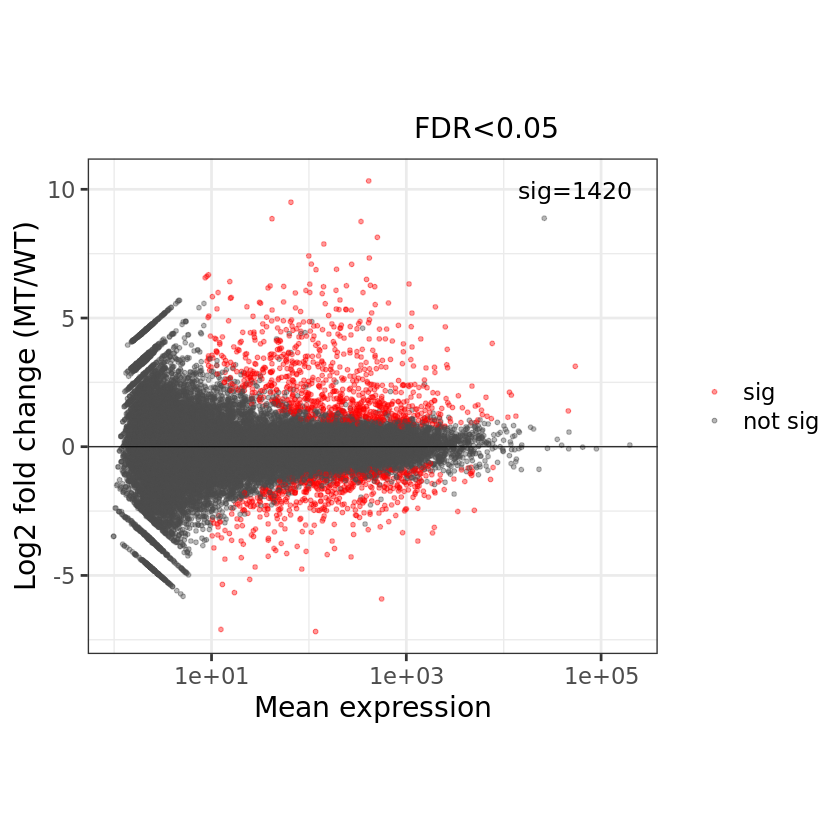

In [49]:
# Load necessary libraries
library(DESeq2)
library(ggplot2)

# 📥 Load DESeq2 object
# Ensure the path to your dds.rds file is correct for your environment.
# For example, if it's in your current working directory, you might just use "dds.rds".
dds <- readRDS("/home/layanomics/CrispAstro-Seq/04_differential_expression/results/dds.rds")

# 📊 Extract results for R270X vs WT
res_df <- as.data.frame(results(dds, contrast = c("condition", "R270X", "WT")))

# 🧪 Apply filtering to match paper:
# padj < 0.05 AND |log2FoldChange| > log2(1.5) ≈ 0.5849625
res_df$signif <- factor(
    ifelse(is.na(res_df$padj), "not sig",
        ifelse(res_df$padj < 0.05 & abs(res_df$log2FoldChange) > 0.5849625, "sig", "not sig")
    ),
    levels = c("sig", "not sig")
)

# 🖼️ Create the MA plot with ggplot2
# Assign the plot to a variable so we can save it
ma_plot <- ggplot(res_df, aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(color = signif), alpha = 0.4, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("sig" = "red", "not sig" = "gray30")) +
    geom_hline(yintercept = 0, color = "black", lwd = 0.3) +
    annotate("text",
        x = max(res_df$baseMean, na.rm = TRUE) * 1.05, # push it further right
        y = 10.3, # closer to top border
        label = paste0("sig=", sum(res_df$signif == "sig", na.rm = TRUE)),
        hjust = 1, vjust = 1, size = 5, fontface = "plain" # bigger font (size = 4)
    ) +
    theme_bw(base_size = 17) +
    labs(
        x = "Mean expression",
        y = "Log2 fold change (MT/WT)",
        title = "FDR<0.05",
        color = NULL
    ) +
    theme(
        aspect.ratio = 2 / 2.3,
        legend.position = "right",
        plot.title = element_text(hjust = 0.6, face = "plain", size = 17),
        plot.title.position = "plot"
    )

# 💾 Save the plot to a high-resolution PNG file
# Adjust 'filename', 'width', 'height', and 'dpi' as needed for your desired output.
# For LinkedIn, a width of 1200-1600px and a height that fits your aspect ratio
# (e.g., 1200x1200 for square, 1080x1350 for 4:5 portrait) is recommended.
# DPI of 300 is standard for high-quality images.
# 💾 Save the plot to a high-resolution PNG file
# Adjusted 'width' and 'height' to create a 908x908 pixel square image at 300 DPI.
ggsave(
    filename = "ma_plot_replicated.png", # Name of the file to save
    plot = ma_plot, # The ggplot object to save
    # width = 3.02666, # 908 pixels / 300 DPI
    # height = 3.02666, # 908 pixels / 300 DPI (to maintain square aspect ratio)
    # dpi = 300 # Dots per inch (resolution)
)

# You can also view the plot in your R environment if you run this code
print(ma_plot)


In [ ]:
# Load necessary libraries
library(DESeq2)
library(ggplot2)

# 📥 Load DESeq2 object
# Ensure the path to your dds.rds file is correct for your environment.
# For example, if it's in your current working directory, you might just use "dds.rds".
dds <- readRDS("/home/layanomics/CrispAstro-Seq/04_differential_expression/results/dds.rds")

# 📊 Extract results for R270X vs WT
res_df <- as.data.frame(results(dds, contrast = c("condition", "R270X", "WT")))

# 🧪 Apply filtering to match paper:
# padj < 0.05 AND |log2FoldChange| > log2(1.5) ≈ 0.5849625
res_df$signif <- factor(
    ifelse(is.na(res_df$padj), "not sig",
        ifelse(res_df$padj < 0.05 & abs(res_df$log2FoldChange) > 0.5849625, "sig", "not sig")
    ),
    levels = c("sig", "not sig")
)

# 🖼️ Create the MA plot with ggplot2
# Assign the plot to a variable so we can save it
ma_plot <- ggplot(res_df, aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(color = signif), alpha = 0.4, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("sig" = "red", "not sig" = "gray30")) +
    geom_hline(yintercept = 0, color = "black", lwd = 0.3) +
    annotate("text",
        x = max(res_df$baseMean, na.rm = TRUE) * 1.05, # push it further right
        y = 10.3, # closer to top border
        label = paste0("sig=", sum(res_df$signif == "sig", na.rm = TRUE)),
        hjust = 1, vjust = 1, size = 5, fontface = "plain" # bigger font (size = 4)
    ) +
    theme_bw(base_size = 17) +
    labs(
        x = "Mean expression",
        y = "Log2 fold change (MT/WT)",
        title = "FDR<0.05",
        color = NULL
    ) +
    theme(
        aspect.ratio = 2 / 2.3,
        legend.position = "right",
        plot.title = element_text(hjust = 0.6, face = "plain", size = 17),
        plot.title.position = "plot"
    )

# 💾 Save the plot to a high-resolution PNG file
# Adjust 'filename', 'width', 'height', and 'dpi' as needed for your desired output.
# For LinkedIn, a width of 1200-1600px and a height that fits your aspect ratio
# (e.g., 1200x1200 for square, 1080x1350 for 4:5 portrait) is recommended.
# DPI of 300 is standard for high-quality images.
# 💾 Save the plot to a high-resolution PNG file
# Adjusted 'width' and 'height' to create a 908x908 pixel square image at 300 DPI.


# You can also view the plot in your R environment if you run this code
print(ma_plot)
